Main Python code to perform the simulation and display results

In [125]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, cdll
from numpy.ctypeslib import ndpointer

In [126]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []

Generate random body system:

In [127]:
count = 100

In [128]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [129]:
bodies = zip(masses := np.array([_ for _ in massGen()]), positions := np.array([_ for _ in positionGen()]), velocities := np.array([_ for _ in velocityGen()]))

Show data:

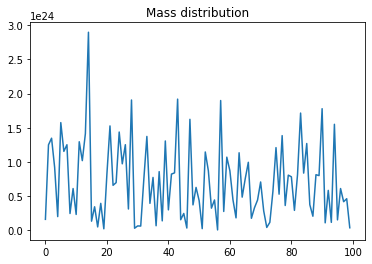

In [130]:
plt.title('Mass distribution')
plt.plot(masses)

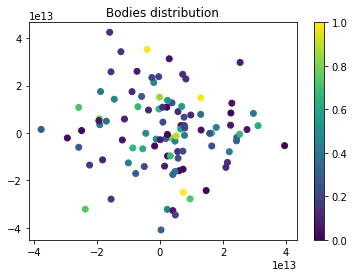

In [131]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

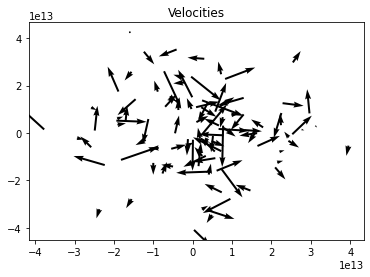

In [132]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Construct Python function from C shared library:

In [134]:
lib = cdll.LoadLibrary("barnes-hut/barneshut.so")
computeForces = lib.perform
computeForces.restype = ndpointer(dtype=c_double,
                          shape=(count,2))

OSError: barnes-hut/barneshut.so: undefined symbol: threshold